In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import models.simple_motor as simpl_mot
import utils as u
from steps import preprocess
from visualization import papermode

papermode(plt, size=12)


In [2]:
# Parameters
abbr = "H01"

In [3]:
preprocess(abbr, verbose=False)
mot_df = simpl_mot.simple_motor(abbr)

H01 : Exported SIMPLEMOTOR CSV in data/runs/H01/models/H01_2023_04_14-10_44_17-TF-boreal01_simplemotor.csv


In [4]:
print(mot_df.columns.values)

['time' 'time_rel' 'vx' 'vy' 'vz' 'px' 'py' 'pz' 'theta' 'phi' 'wz' 'ax'
 'ay' 'az' 'qw' 'qx' 'qy' 'qz' 'cmd_v' 'cmd_w' 'wL' 'wR' 'voltage' 'V_L'
 'V_R' 'current_cpu' 'I_L' 'I_R' 'ax_corr' 'ay_corr' 'az_corr' 'v' 'a'
 'vL' 'vR' 'PE_L' 'PE_R' 'Tmot_L' 'Tmot_R' 'TL' 'TR' 'PM_L' 'PM_R'
 'P_logical' 'P_motion' 'PE_motion' 'P_total' 'Ploss_L' 'Rloss_L'
 'Ploss_R' 'Rloss_R' 'eta_L' 'eta_R' 'P_mot' 'P_log' 'dI_L' 'dI_R' 'dt'
 'dILdt' 'dIRdt' 'wmotL' 'wmotR' 'U_L' 'U_R']


In [5]:
model_name = simpl_mot.__MODEL_NAME__.lower()
basename = u.get_basename(u.get_filename(abbr))
figdir = u.get_figdir(basename, subdir=model_name)
model_name = simpl_mot.__MODEL_NAME__.title()
cmap = plt.get_cmap("turbo")

In [6]:
mot_df.PE_L.max(), mot_df.PE_R.max()

(296.1728, 190.0199)

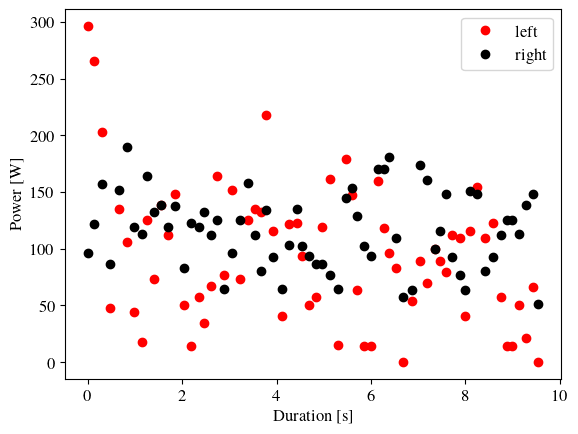

In [7]:
fig, ax = plt.subplots()
ax.plot(mot_df.time_rel, mot_df.PE_L, "ro", label="left")
ax.plot(mot_df.time_rel, mot_df.PE_R, "ko", label="right")
ax.set_xlabel("Duration [s]")
ax.set_ylabel("Power [W]")
ax.legend()

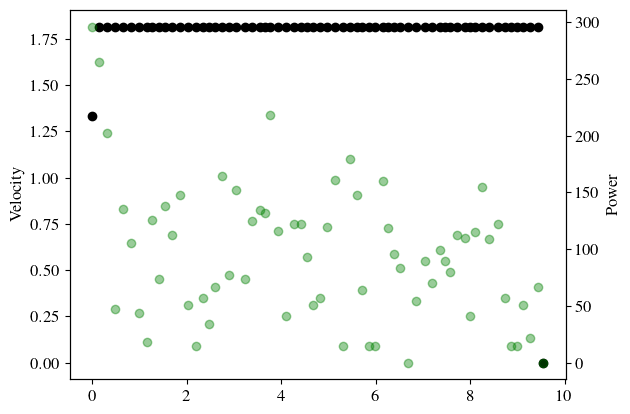

In [8]:
fig, ax1 = plt.subplots()
# ax1.plot(motor["left"].time, motor["left"].wL, "ro", label="interpolated")
ax2 = ax1.twinx()
ax1.set_ylabel("Velocity")
ax2.set_ylabel("Power")
ax1.plot(mot_df.time_rel, mot_df.wL, "ko", label="original")
ax2.plot(mot_df.time_rel, mot_df.PE_L, "go", label="power", alpha=0.4)
# ax1.set_ylim((-10, 5000))

Text(0, 0.5, 'Power $P$ [W]')

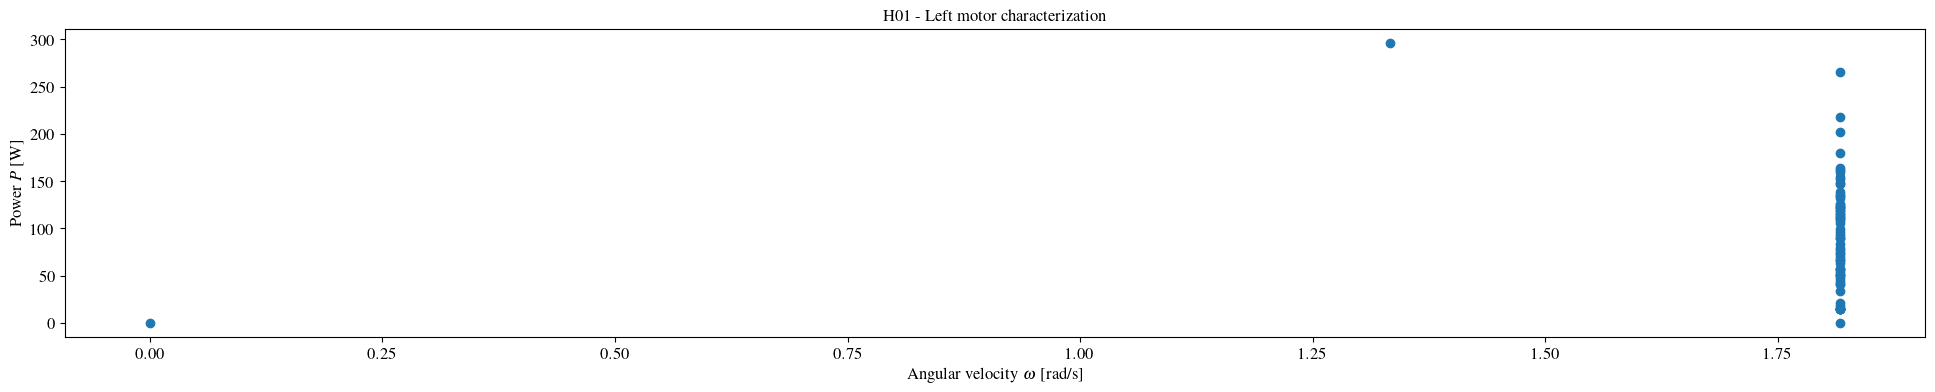

In [9]:
# plt.rcParams["text.usetex"] = True
fig, ax = plt.subplots(figsize=(24, 4))
ax.plot(mot_df.wL.abs(), mot_df.PE_L, "o")
ax.set_title(f"{abbr} - Left motor characterization")
ax.set_xlabel("Angular velocity $\omega$ [rad/s]")
ax.set_ylabel("Power $P$ [W]")

Text(0, 0.5, 'Power $P$ [W]')

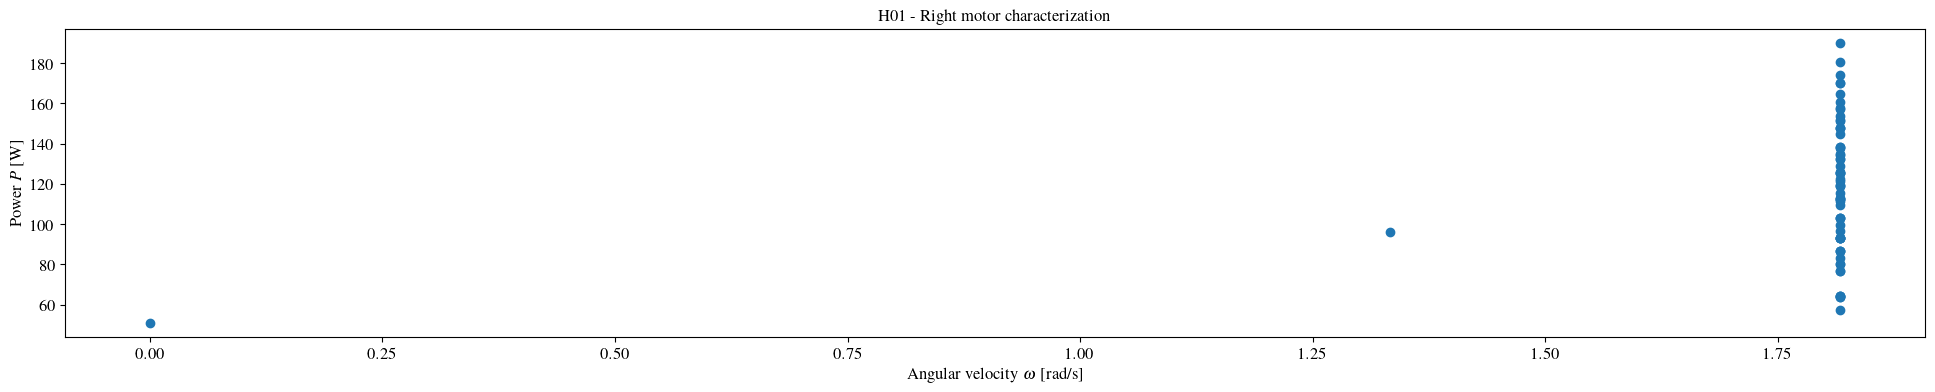

In [10]:
# plt.rcParams["text.usetex"] = True
fig, ax = plt.subplots(figsize=(24, 4))
ax.plot(mot_df.wR.abs(), mot_df.PE_R, "o")
ax.set_title(f"{abbr} - Right motor characterization")
ax.set_xlabel("Angular velocity $\omega$ [rad/s]")
ax.set_ylabel("Power $P$ [W]")

<AxesSubplot: >

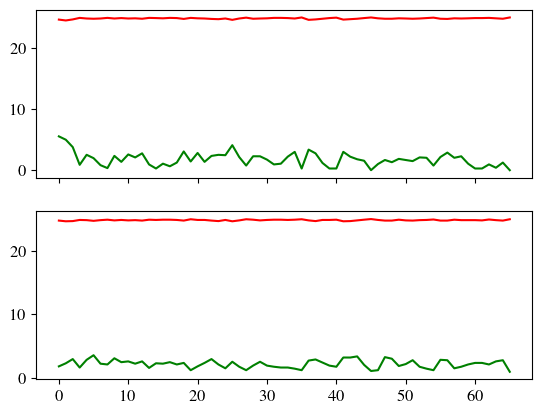

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
mot_df.V_L.plot(color="r", ax=ax1, label="Measured voltage")
mot_df.U_L.plot(color="g", ax=ax1, label="Modelled voltage")
mot_df.V_R.plot(color="r", ax=ax2, label="Measured voltage")
mot_df.U_R.plot(color="g", ax=ax2, label="Modelled voltage")

In [12]:
power["left"]["dt"] = power["left"].time.diff()
power["left"]["dt"].iloc[0] = power["left"]["dt"].iloc[1]
power["left"]["dI"] = power["left"].I.diff().fillna(0)
power["left"]["dIdt"] = power["left"].dI / power["left"].dt


fig, ax = plt.subplots(figsize=(24, 4))
ax.plot(power["left"].w.abs(), power["left"].dIdt.abs(), "o")
ax.set_title(f"{abbr} - Left motor characterization through nearest index")
ax.set_xlabel("Angular velocity $\omega$ [rad/s]")
ax.set_ylabel("Derivative of current (A/s)")

NameError: name 'power' is not defined

In [ ]:
motor["right"]["dt"] = motor["right"].time.diff()
motor["right"]["dt"].iloc[0] = motor["right"]["dt"].iloc[1]
motor["right"]["dI"] = motor["right"].I.diff().fillna(0)
motor["right"]["dIdt"] = motor["right"].dI / motor["right"].dt


fig, ax = plt.subplots(figsize=(24, 4))
ax.plot(motor["right"].w.abs(), motor["right"].dIdt.abs(), "o")
ax.set_title(f"{abbr} - Right motor characterization through nearest index")
ax.set_xlabel("Angular velocity $\omega$ [rad/s]")
ax.set_ylabel("Derivative of current (A/s)")

In [ ]:
fig, ax = plt.subplots(figsize=(24, 4))
ax.plot(motor["right"].I, motor["right"].V, "o")
ax.set_title(f"{abbr} - Right motor characterization through nearest index")
ax.set_xlabel("Current [A]")
ax.set_ylabel("Volage [V]")

In [ ]:
fig, ax = plt.subplots(figsize=(24, 4))
ax.plot(power["right"].I, power["right"].V, "o")
ax.set_title(f"{abbr} - Right motor characterization through nearest index")
ax.set_xlabel("Current [A]")
ax.set_ylabel("Voltage [V]")

In [ ]:
power["left"]["TMec"] = power["left"].P / power["left"].w
power["right"]["TMec"] = power["right"].P / power["right"].w

fig, [ax1, ax2] = plt.subplots(sharex=True, nrows=2)
power["left"].TMec.plot(ax=ax1)
power["right"].TMec.plot(ax=ax2)

# ax1.set_ylim((-1500, 4500))
# ax2.set_ylim((-4500, 1500))

ax1.set_ylabel("Left motor")
ax2.set_ylabel("Right motor")

fig.supylabel("Torque [N.m]", x=-0.05)
fig.supxlabel("Time [s]")

fig.suptitle(f"{abbr} - Motor torques")

In [ ]:
power["left"]["Fmec"] = power["left"].TMec / radius
power["right"]["Fmec"] = power["right"].TMec / radius

fig, [ax1, ax2] = plt.subplots(sharex=True, nrows=2)
power["left"].Fmec.plot(ax=ax1)
power["right"].Fmec.plot(ax=ax2)

# ax1.set_ylim((-5000, 5000))
# ax2.set_ylim((-5000, 5000))

ax1.set_ylabel("Left motor")
ax2.set_ylabel("Right motor")

fig.supylabel("Force [N]", x=-0.05)
fig.supxlabel("Time [s]")

fig.suptitle(f"{abbr} - Traction forces")

In [ ]:
fig, [ax1, ax2] = plt.subplots(sharex=True, nrows=2, figsize=(7,7))
ax1.plot(power["left"].w, power["left"].TMec, "o", markersize=2)
ax2.plot(power["right"].w, power["right"].TMec, "o", markersize=2)

# ax1.set_ylim((-2000, 2000))
# ax2.set_ylim((-2000, 2000))

ax1.set_ylabel("Left motor")
ax2.set_ylabel("Right motor")

fig.supylabel("Torque [N.m]", x=-0.05)
fig.supxlabel("$\omega$ [rad/s]")

fig.suptitle(f"{abbr} - Motor torques vs Speeds")

In [ ]:
fig, axs = plt.subplots(nrows=4, sharex=True, figsize=((8,12)))
axs = axs.reshape(-1)

power["right"].w.iloc[500:550].plot(ax=axs[0])
power["right"].I.iloc[500:550].plot(ax=axs[1])
power["right"].V.iloc[500:550].plot(ax=axs[2])
power["right"].P.iloc[500:550].plot(ax=axs[3])

axs[0].set_ylabel("$\omega$")
axs[1].set_ylabel("Current")
axs[2].set_ylabel("Voltage")
axs[3].set_ylabel("Power")


In [ ]:
motor["right"].w.iloc[10400:11200].plot()

In [ ]:
fig, axs = plt.subplots(nrows=4, sharex=True, figsize=((8,12)))
axs = axs.reshape(-1)

motor["right"].w.iloc[10400:11200].plot(ax=axs[0])
motor["right"].I.iloc[10400:11200].plot(ax=axs[1])
motor["right"].V.iloc[10400:11200].plot(ax=axs[2])
motor["right"].P.iloc[10400:11200].plot(ax=axs[3])

axs[0].set_ylabel("$\omega$")
axs[1].set_ylabel("Current")
axs[2].set_ylabel("Voltage")
axs[3].set_ylabel("Power")